In [ ]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/armoutihansen/EEMP2020/main/datasets/income.csv'

df = pd.read_csv(path_to_data)

In [ ]:
# Solution 2
df_sample = df.sample(n=1000, random_state=181)
X = df_sample[['age']]
y = df_sample['income']

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3).fit(X,y)

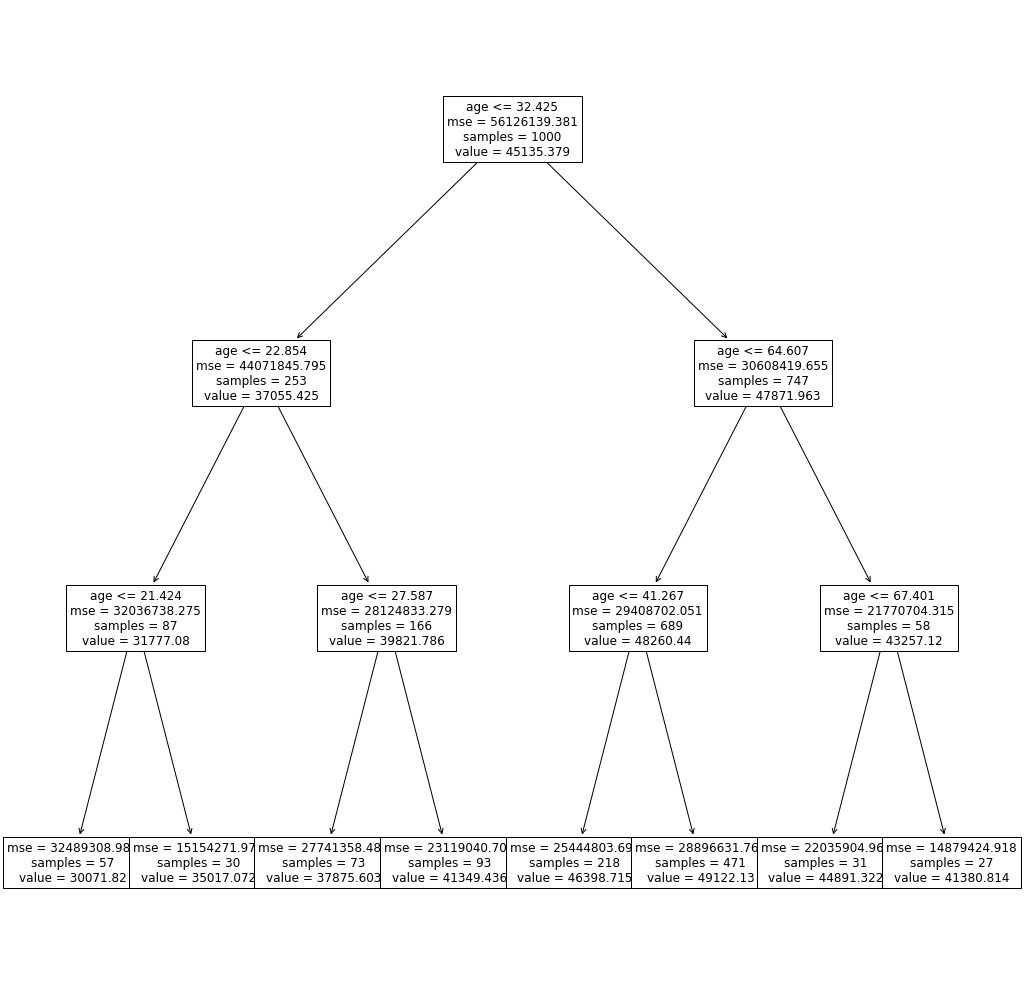

In [ ]:
# Solution 3
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 18))
tree.plot_tree(reg, feature_names=['age'], fontsize=12);

In [ ]:
# Solution 4
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1,11)}
reg_cv = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error').fit(X,y)
reg_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Solution 5
reg_cv.best_score_*-1

29638079.619032513

In [ ]:
# Solution 6
path_to_data = 'https://raw.githubusercontent.com/armoutihansen/EEMP2020/main/datasets/Default.csv'

df = pd.read_csv(path_to_data)

In [ ]:
# Solution 7
df_sample = df.sample(n=1000, random_state=181)
X = df_sample[['income', 'balance']]
y = df_sample['default']

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3).fit(X,y)

In [ ]:
# Solution 8
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 18))
tree.plot_tree(clf, feature_names=['income', 'balance'],
class_names=['no', 'yes'], fontsize=12);

In [ ]:
# Solution 9
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100,300,500], 'max_features': ['auto']}

clf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=5).fit(X,y)
clf_cv.best_estimator_

In [ ]:
clf_cv.best_score_

In [ ]:
# EXTRA

(pd.Series(clf_cv.best_estimator_.feature_importances_*100, index=X.columns).nlargest(2).plot(kind='barh')) 
plt.xlabel('Percentage improvement')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Classifier')
plt.show;